## 문제 1. 
- 기존 시각화를 16개 그래프를 4 x 4 형태로 변형해서 시각화를 그리세요

In [1]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\user\Desktop\sourceCode\hg_da\ns_book7.csv
100%|██████████| 53.8M/53.8M [01:20<00:00, 672kB/s] 


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9 = ns_book9.reset_index()

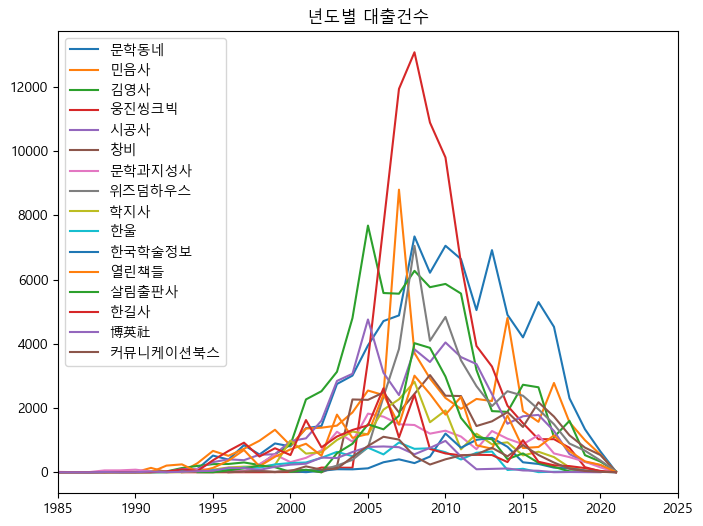

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'Malgun Gothic' # 옵션 설정

fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:16]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
plt.show()

- if-else 조건 사용

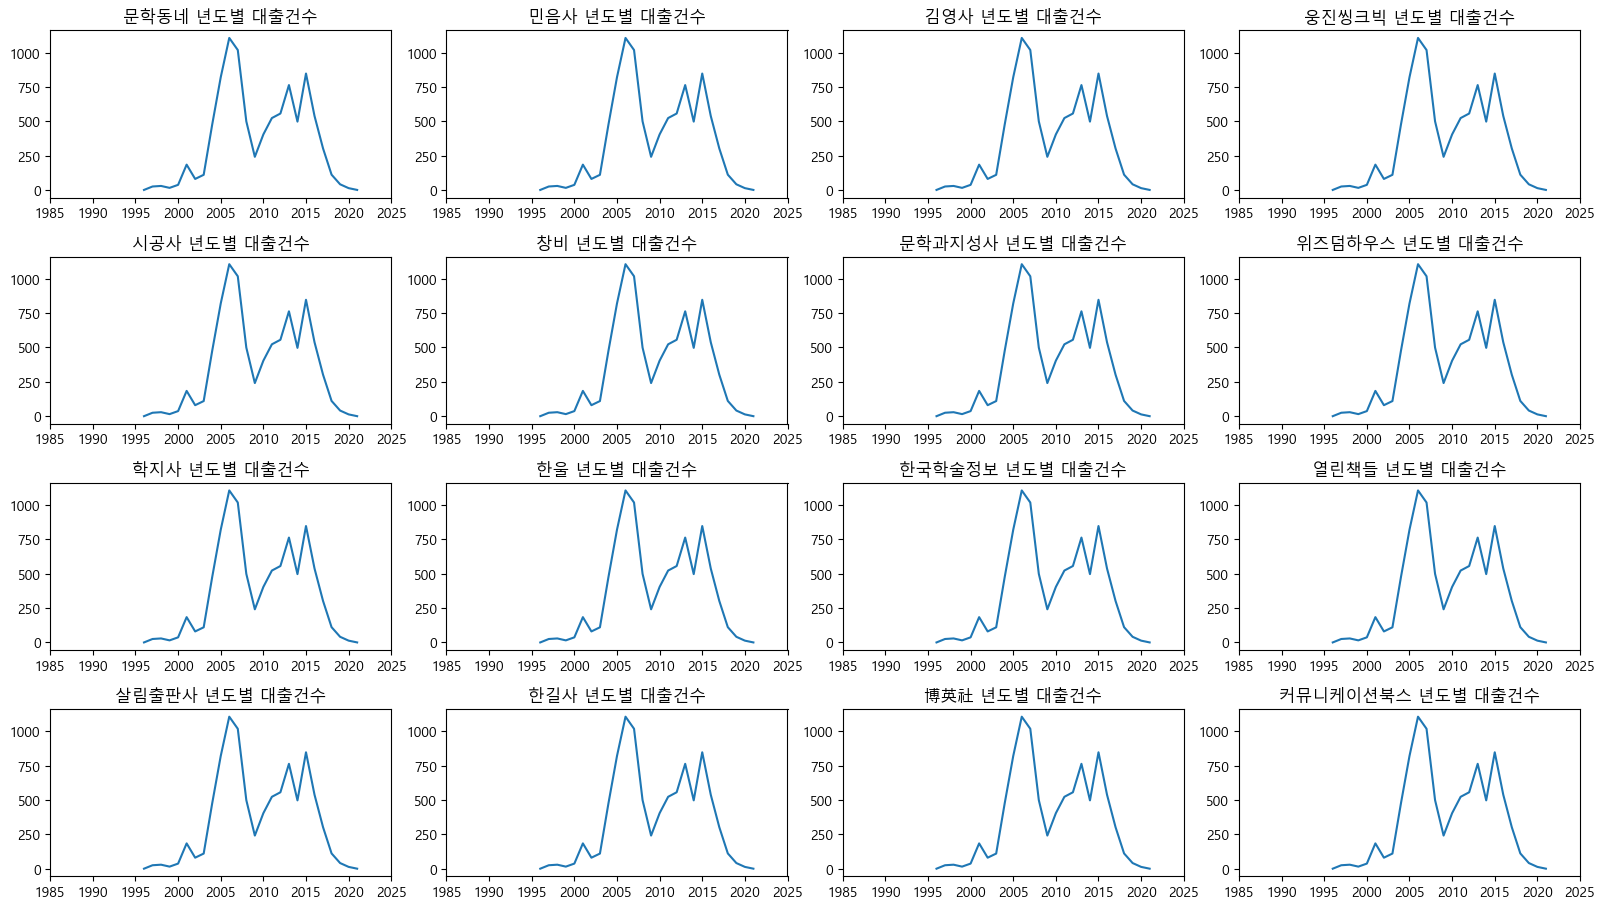

In [58]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
for i, pub in enumerate(top30_pubs.index[:16]):
   # code
    
    if i <= 3:
        ax[0,i].plot(line['발행년도'], line['대출건수'], label = pub)
        ax[0,i].set_title(f'{pub} 년도별 대출건수')
        ax[0,i].set_xlim(1985,2025)
    elif i <=7:
        ax[1,i-4].plot(line['발행년도'],line['대출건수'], label = pub)
        ax[1,i-4].set_title(f'{pub} 년도별 대출건수')
        ax[1,i-4].set_xlim(1985,2025)
    elif i <= 11:
        ax[2, i-8].plot(line['발행년도'], line['대출건수'], label=pub)
        ax[2, i-8].set_title(f'{pub} 년도별 대출건수')
        ax[2, i-8].set_xlim(1985, 2025)
    else:
        ax[3, i-12].plot(line['발행년도'], line['대출건수'], label=pub)
        ax[3, i-12].set_title(f'{pub} 년도별 대출건수')
        ax[3, i-12].set_xlim(1985, 2025)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 좀 더 간결하게 해보자

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


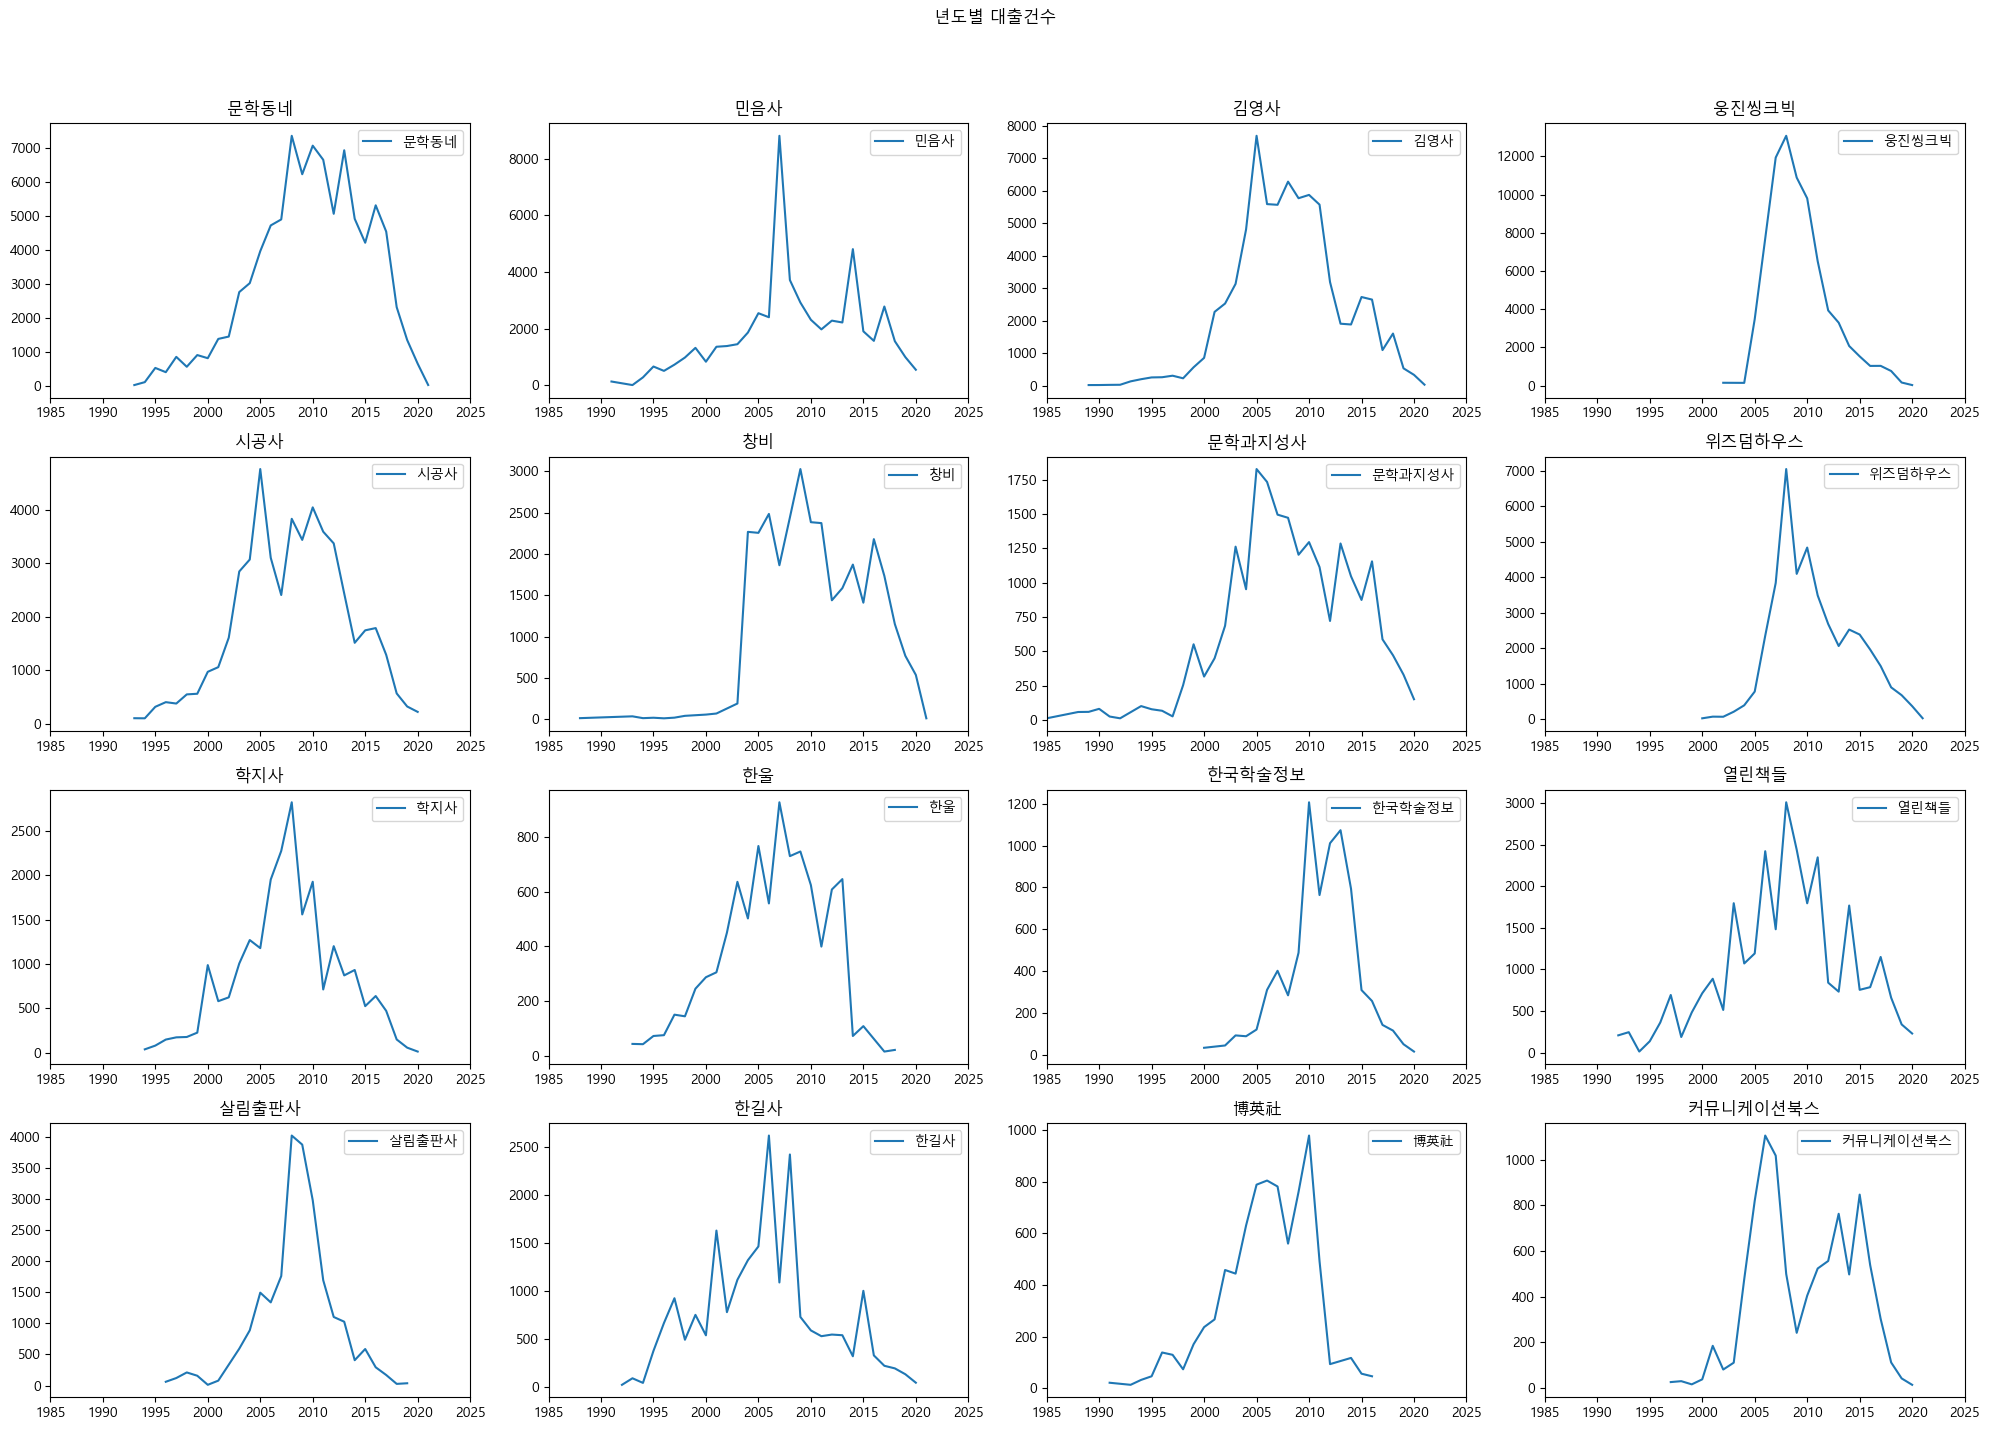

In [60]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
fig.suptitle('년도별 대출건수')

for i, pub in enumerate(top30_pubs.index[:16]):
    row = i // 4
    col = i % 4
    print(row, col)
    ax = axs[row, col]
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
    ax.set_title(pub)
    ax.set_xlim(1985, 2025)
    ax.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 문제 2. 
-  대출건수가 10 이상인 도서들을 필터링하는 코드를 작성하세요. 

In [50]:
ns_book7.loc[ns_book7['대출건수'] >= 10].reset_index(drop = True).shape

(135535, 13)

In [24]:
# code
ns_book10 = ns_book7.loc[ns_book7['대출건수'] >= 10]
ns_book10.shape

(135535, 13)

## 문제 3
- isin 함수를 사용하여 저자가 '김동훈' 또는 '김태형'인 도서들을 필터링하세요.

In [64]:
# code
#name = ['김동훈', '김태형']
#ns_book7[ns_book7['저자'].isin(name)]
ns_book7[ns_book7['저자'].isin(['김태형','김동훈'])]

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
18188,19016,혐오 시대 헤쳐가기,김태형,열린책들,2019,9788932920009,NaN,NaN,NaN,NaN,1,1,2020-01-23,NaN


## 문제 4. 
- 발행년도가 2020년 이상이고 대출건수가 5 이상인 도서들을 필터링하는 코드를 작성하세요.

In [48]:
# code
ns_book12 = ns_book7.loc[(ns_book7['발행년도'] >= 2020 ) & (ns_book7['대출건수'] >= 5) ]
ns_book12.shape

(1902, 13)

## 문제 5. 
- apply와 lambda를 사용하여 대출건수가 5 이상인 도서들의 도서명을 대문자로 변환하는 코드를 작성하세요.
    + 예: 해커스 토익:LISTENING ==> *** 해커스 토익:LISTENING ***
    + 새로운 컬럼명을 추가하세요. '도서명 + 5건이상'

In [70]:
# code
ns_book7['도서명 + 5건이상'] = ns_book7.loc[ns_book7['대출건수'] >= 5.0, '도서명'].apply(lambda x: "***" + x + "***")
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


## 문제 6. 
- 위 변형된 데이터셋에서 대출건수가 4와 5인 건수만 출력하세요. 

In [46]:
# code
ns_book14 = ns_book7.loc[ns_book7['대출건수'].isin([4.0, 5.0]), :]
ns_book14.reset_index(drop =True)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,134,그럼에도 나는 아파트를 사기로 했다,지은이: 박성혜,매경출판,2021,9791164841868,NaN,0,NaN,327.87,1,4,2021-03-12
1,1488,"빌 게이츠, 기후재앙을 피하는 법","빌 게이츠 지음, 김민주.이엽 옮김",김영사,2021,9788934991366,NaN,NaN,NaN,539.9,1,4,2021-02-23
2,1629,서울 아파트 황금 지도 (부동산 입지분석 고수 탑곰의 비밀 노트),탑곰,비에이블,2021,9791190931335,NaN,NaN,NaN,327.87,1,4,2021-02-16
3,1683,이어령 80년 생각 :'창조적 생각'의 탄생을 묻는 100시간의 인터뷰,김민희 지음,위즈덤하우스,2021,9791191308303,NaN,0,NaN,199.1,1,4,2021-02-10
4,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40779,370402,PIC 마이컴 기초부터 활용까지,권우현 저,컴파일테크놀로지,2003,9788987516042,NaN,9,NaN,566.37,1,5,2004-10-20
40780,370417,Maya,Danny Riddell;Andrew S. Britt [공]원저;황정하 옮김,비앤비,2002,9788955240733,NaN,9,NaN,566.76,1,5,2004-10-20
40781,370423,인간공학,Wickens,시그마프레스,2002,9788984450806,NaN,9,NaN,530.8,1,5,2004-10-20
40782,370436,야윈 젖가슴,이청준 지음,마음산책,2001,9788989351139,NaN,0,NaN,814.6,2,5,2004-10-20


## 문제 7. 
- 저자 컬럼에서 류시화가 포함된 것만 추출하세요. 

In [56]:
# code
ns_book7[ns_book7['저자'].str.contains('류시화')].reset_index(drop = True)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,도서명 + 5건이상
0,1737,마음챙김의 시,류시화 엮음,수오서재,2020,9791190382267,NaN,0,NaN,808.1,1,4,2021-02-09,NaN
1,4693,"마음챙김의 시(독치1, 움도1)",류시화 엮음,수오서재,2020,9791190382267,NaN,NaN,NaN,NaN,2,5,2020-11-13,"***마음챙김의 시(독치1, 움도1)***"
2,7017,마음챙김의 시,류시화 (엮은이),수오서재,2020,9791190382267,NaN,NaN,NaN,808.1,1,7,2020-09-21,***마음챙김의 시***
3,12707,나는 나,"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,3,2020-06-12,NaN
4,12911,나는 나(스마트1),"캐럴 피어슨 지음, 류시화 옮김",연금술사,2020,9791186686508,NaN,NaN,NaN,NaN,1,4,2020-06-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,372861,하늘 호수로 떠난 여행,류시화,열림원,2007,9788970631264,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
98,376698,외눈박이 물고기의 사랑,류시화,열림원,1998,9788970631011,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
99,376707,그대가 곁에 있어도 나는 그대가 그립다,류시화,푸른숲,1998,9788971841235,NaN,NaN,NaN,NaN,1,0,1970-01-01,NaN
100,380589,히말라야의 새,루디야드 키플링 지음;류시화 옮김,불일출판사,1992,9788985352000,NaN,NaN,NaN,843,1,0,1970-01-01,NaN


## 문제 8. 
-  저자 열에서 '류시화 엮음', '류시화 지음'과 같은 값을 '시화 류'로 변경하는 코드를 작성하세요.

In [ ]:
# code
ns_book7[